# Домашнее задание по статистическому анализу на python

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [91]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [92]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

# Это равномерные распределения 

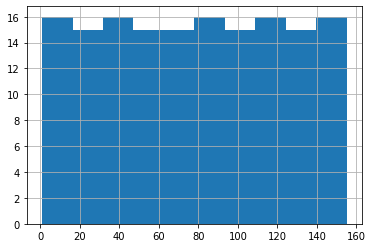

In [93]:
df.Freedom.hist()

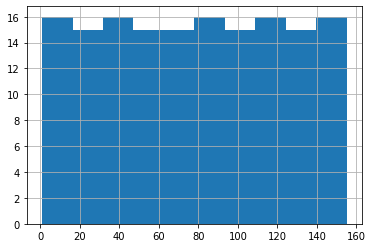

In [94]:
df['Positive affect'].hist()

In [95]:
df=df.dropna(subset=['Freedom','Positive affect'])

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

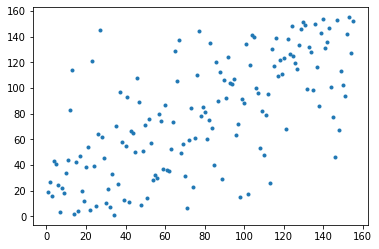

In [96]:
plt.scatter(df.Freedom, df['Positive affect'], marker='.')

In [97]:
#медиана
statistics.median(df.Freedom)

78.0

In [100]:
#мода
try:
    statistics.mode()
except:
    print('в этом дата сете несколько мод')

в этом дата сете несколько мод


In [69]:
#мат ожидание
np.mean(df.Freedom)

78.0

In [72]:
#ст. отклонение
statistics.stdev(df.Freedom)

44.88875137492688

In [70]:
#дисперсия

np.var(df.Freedom, ddof=1)

2015.0

In [62]:
#размах
max(df.Freedom)-min(df.Freedom)

154.0

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

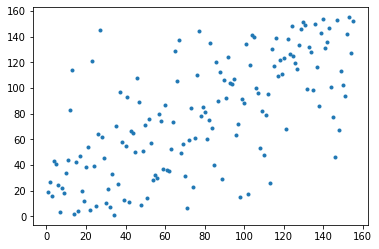

In [63]:
plt.scatter(df.Freedom, df['Positive affect'], marker='.')


In [64]:
from scipy.stats.stats import pearsonr

In [66]:
corr,p_value=pearsonr(df.Freedom, df['Positive affect'])

In [67]:
corr

0.6817698430601656

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [101]:
Freedom=df.Freedom

In [105]:
Freedom.head()

0     5.0
1     6.0
2     3.0
3     7.0
4    19.0
Name: Freedom, dtype: float64

In [103]:
Freedom_1 = Freedom - statistics.mean(Freedom)
print(statistics.mean(Freedom_1))

0.0


In [109]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

Freedom_2 = min_max_scaler.fit_transform(np.array(Freedom_1).reshape(-1, 1))
print(min(Freedom_2))
print(max(Freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

In [74]:
import seaborn as sns

In [76]:
corr_matrix=df.corr()

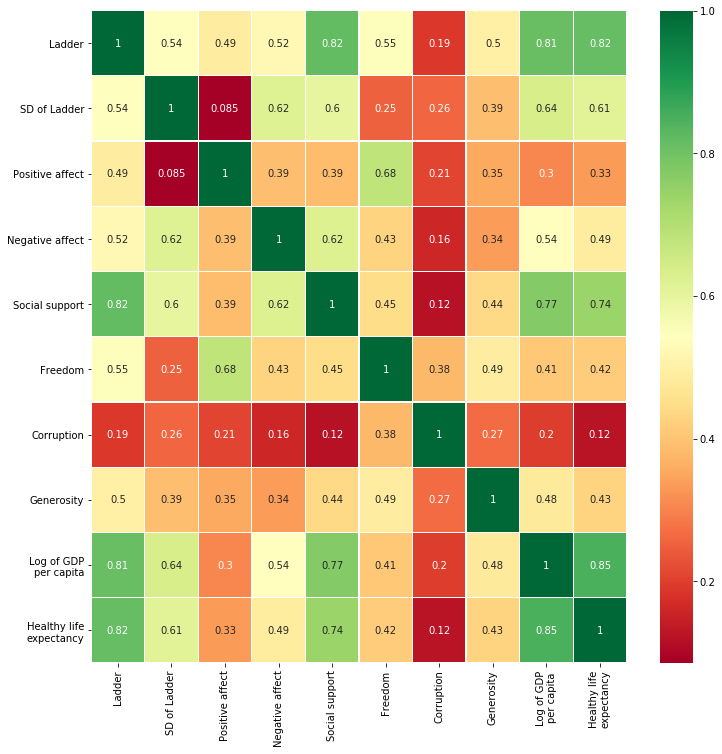

In [80]:
sns.heatmap(corr_matrix,annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [81]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

# Нормальное, немного скошенное влево

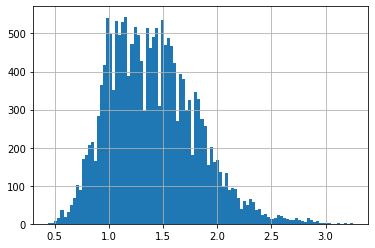

In [85]:
df.AveragePrice.hist(bins=100)

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [89]:
corr, p_val=pearsonr(df['4046'],df.AveragePrice)
corr

-0.2083170484878849